In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.corr()['Outcome'].sort_values(ascending=False)


,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [9]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [20]:
results = {}
confusion_matrices = []


def Model_Evaluation(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
    }
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((name, cm))

def plot_confusion_matrices(conf_matrices):
    n = len(conf_matrices)
    fig, axes = plt.subplots(1, n, figsize=(n, 2))
    if n == 1:
        axes = [axes]
    for ax, (name, cm) in zip(axes, conf_matrices):
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(f"{name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    plt.tight_layout()
    plt.show()

def grid_search(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_

In [11]:
# Hyperparameters
tree_params = {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10]}
forest_params = {"n_estimators": [50, 100], "max_depth": [5, 10]}
log_params = {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear"]}

In [21]:
# Models with GridSearchCV with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_best = grid_search(LogisticRegression(), log_params, X_train, y_train)
Model_Evaluation("LogisticRegression_Original", log_best, X_test, y_test)

tree_best = grid_search(DecisionTreeClassifier(), tree_params, X_train, y_train)
Model_Evaluation("DecisionTree_Original", tree_best, X_test, y_test)

forest_best = grid_search(RandomForestClassifier(), forest_params, X_train, y_train)
Model_Evaluation("RandomForest_Original", forest_best, X_test, y_test)


In [22]:
# Models with GridSearchCV with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_best = grid_search(LogisticRegression(), log_params, X_train, y_train)
Model_Evaluation("LogisticRegression_Original", log_best, X_test, y_test)

tree_best = grid_search(DecisionTreeClassifier(), tree_params, X_train, y_train)
Model_Evaluation("DecisionTree_Original", tree_best, X_test, y_test)

forest_best = grid_search(RandomForestClassifier(), forest_params, X_train, y_train)
Model_Evaluation("RandomForest_Original", forest_best, X_test, y_test)


In [23]:
# Standard Scaling with 70% training and 30% testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

log_best_s = grid_search(LogisticRegression(), log_params, X_train_s, y_train_s)
Model_Evaluation("LogisticRegression_Scaled", log_best_s, X_test_s, y_test_s)

tree_best_s = grid_search(DecisionTreeClassifier(), tree_params, X_train_s, y_train_s)
Model_Evaluation("DecisionTree_Scaled", tree_best_s, X_test_s, y_test_s)

forest_best_s = grid_search(RandomForestClassifier(), forest_params, X_train_s, y_train_s)
Model_Evaluation("RandomForest_Scaled", forest_best_s, X_test_s, y_test_s)


In [24]:
# Standard Scaling with 80% training and 20% testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_best_s = grid_search(LogisticRegression(), log_params, X_train_s, y_train_s)
Model_Evaluation("LogisticRegression_Scaled", log_best_s, X_test_s, y_test_s)

tree_best_s = grid_search(DecisionTreeClassifier(), tree_params, X_train_s, y_train_s)
Model_Evaluation("DecisionTree_Scaled", tree_best_s, X_test_s, y_test_s)

forest_best_s = grid_search(RandomForestClassifier(), forest_params, X_train_s, y_train_s)
Model_Evaluation("RandomForest_Scaled", forest_best_s, X_test_s, y_test_s)


In [25]:
# 3. With SMOTE 70% training and 30% testing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

log_best_sm = grid_search(LogisticRegression(), log_params, X_train_sm, y_train_sm)
Model_Evaluation("LogisticRegression_SMOTE", log_best_sm, X_test_sm, y_test_sm)

tree_best_sm = grid_search(DecisionTreeClassifier(), tree_params, X_train_sm, y_train_sm)
Model_Evaluation("DecisionTree_SMOTE", tree_best_sm, X_test_sm, y_test_sm)

forest_best_sm = grid_search(RandomForestClassifier(), forest_params, X_train_sm, y_train_sm)
Model_Evaluation("RandomForest_SMOTE", forest_best_sm, X_test_sm, y_test_sm)


In [26]:
#SMOTE 80% training and 20% testing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

log_best_sm = grid_search(LogisticRegression(), log_params, X_train_sm, y_train_sm)
Model_Evaluation("LogisticRegression_SMOTE", log_best_sm, X_test_sm, y_test_sm)

tree_best_sm = grid_search(DecisionTreeClassifier(), tree_params, X_train_sm, y_train_sm)
Model_Evaluation("DecisionTree_SMOTE", tree_best_sm, X_test_sm, y_test_sm)

forest_best_sm = grid_search(RandomForestClassifier(), forest_params, X_train_sm, y_train_sm)
Model_Evaluation("RandomForest_SMOTE", forest_best_sm, X_test_sm, y_test_sm)



Model Comparison Table:
                             Accuracy  Precision    Recall  F1-Score
RandomForest_SMOTE           0.810000   0.778761  0.871287  0.822430
LogisticRegression_SMOTE     0.755000   0.754902  0.762376  0.758621
DecisionTree_SMOTE           0.735000   0.718182  0.782178  0.748815
RandomForest_Scaled          0.772727   0.678571  0.690909  0.684685
RandomForest_Original        0.772727   0.700000  0.636364  0.666667
LogisticRegression_Scaled    0.753247   0.649123  0.672727  0.660714
LogisticRegression_Original  0.753247   0.654545  0.654545  0.654545
DecisionTree_Scaled          0.759740   0.680000  0.618182  0.647619
DecisionTree_Original        0.759740   0.680000  0.618182  0.647619


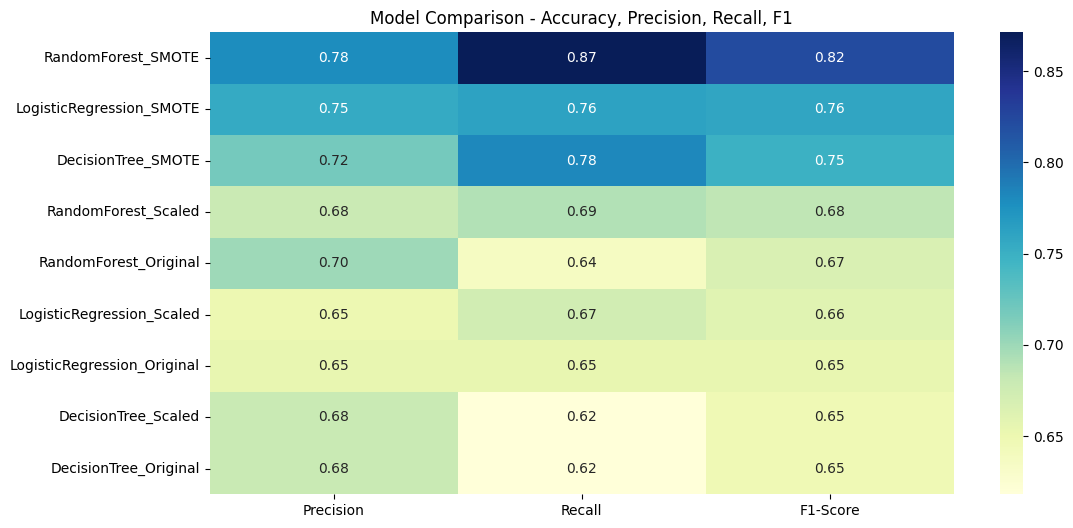

In [27]:
# Summary Table
results_df = pd.DataFrame(results).T.sort_values("F1-Score", ascending=False)
print("\nModel Comparison Table:")
print(results_df)

# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(results_df.iloc[:, 1:], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Comparison - Accuracy, Precision, Recall, F1")
plt.yticks(rotation=0)
plt.show()
